# Function for Plotting

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from opfunu import cec_based
from ipywidgets import interact

In [73]:
def Plot_Min50Max(Dataset_Results,Y_Scale='linear'):
    fig , axes = plt.subplots(subplot_kw={'yscale':Y_Scale})

    plot = sns.scatterplot(Dataset_Results.describe().loc[['min','50%','max']].T,ax=axes)
    
    plot.set_title(Dataset_Results.__name__)
    plot.set_xlabel('Generation')
    plot.set_ylabel('Function Value')

In [74]:
def Plot_Generation_FunctionValues(Dataset_Results,Y_Scale='linear'):
    fig , axes = plt.subplots(figsize=(10,6),subplot_kw={'yscale':Y_Scale})

    for generation in Dataset_Results.columns:
        sns.scatterplot(x=generation,y=Dataset_Results[generation],color='red',alpha=0.005,ax=axes)
        
    axes.set_title(Dataset_Results.__name__)
    axes.set_xlabel('Generation')
    axes.set_ylabel('Function Value')

In [78]:
def InteractivePlot(Dataset_Results,X_Scale='linear'):

    def PlotFunctionValue(generation):
        fig , axes = plt.subplots(subplot_kw={'xscale':X_Scale})

        sns.histplot(x=Dataset_Results[generation],bins=50,color='gray',ax=axes)
        axes.axvline(Dataset_Results[generation].mean(),ls=':',color='red',label='Mean')
        axes.axvline(Dataset_Results[generation].median(),ls=':',color='blue',label='Median')

        axes.set_title(Dataset_Results.__name__)
        axes.set_xlabel('Function Value')
        fig.legend()

    interact(PlotFunctionValue,generation=(0,len(Dataset_Results.columns)-1,1))

# Time Execution

In [135]:
TimeExecution = pd.read_csv('./Dim_2/TimeExecution_Results.csv',index_col=0)

In [136]:
TimeExecution # Time in seconds

,Base,RandomSample,Agglomerative,RandomParameters
F1,12.146414,18.868851,9.645253,9.153826
F2,9.860910,17.219354,11.541068,11.180574
F3,13.242429,20.453842,13.246447,12.905626
F4,11.343526,18.102936,11.492209,11.680597
F5,9.559351,15.580622,10.078485,9.434922
F6,16.615558,25.729958,18.791724,17.767607
F7,34.656600,39.287127,32.476375,31.886522
F8,19.373604,25.571104,18.655575,17.908729
F9,28.447329,35.343001,28.649424,27.512666
F20,40.467459,47.631056,41.488745,41.404047


In [137]:
TimeExecution.T.describe().loc[['mean','std','50%']]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F20,F21,F22,F23,F24,F25,F26,F27
mean,12.453586,12.450477,14.962086,13.154817,11.163345,19.726212,34.576656,20.377253,29.988105,42.747827,57.187649,68.05476,52.533366,62.215497,91.397048,95.679142,85.302368
std,4.473072,3.260252,3.664653,3.301628,2.958012,4.100021,3.358717,3.513838,3.604107,3.288213,3.283130,3.61836,4.612792,4.824688,4.243612,3.827679,3.369479
50%,10.895833,11.360821,13.244438,11.586403,9.818918,18.279665,33.566487,19.014589,28.548377,41.446396,55.877493,66.62963,50.279896,60.065358,89.703310,93.997791,83.897949


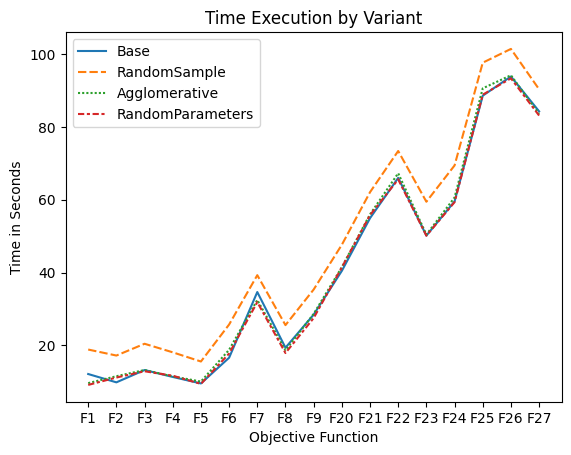

In [149]:
plot = sns.lineplot(data=TimeExecution)
plot.set_title('Time Execution by Variant')
plot.set_xlabel('Objective Function')
plot.set_ylabel('Time in Seconds');

In [154]:
TimeExecution[['Base','Agglomerative','RandomParameters']].T.describe().loc[['mean','std','50%']]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F20,F21,F22,F23,F24,F25,F26,F27
mean,10.315164,10.860851,13.131501,11.505444,9.690919,17.724963,33.006499,18.645969,28.203140,41.120084,55.561919,66.281260,50.227897,59.819419,89.322762,93.773164,83.634306
std,1.604831,0.884534,0.195624,0.168925,0.341359,1.088709,1.459146,0.732484,0.606446,0.566774,0.557164,0.875763,0.160112,0.685043,1.093804,0.424463,0.579223
50%,9.645253,11.180574,13.242429,11.492209,9.559351,17.767607,32.476375,18.655575,28.447329,41.404047,55.769464,65.994904,50.147516,59.528865,88.830409,93.828094,83.541613


# Function 1

In [86]:
NumberFunction = '1'
Scale = 'log'

## Function Plot

In [46]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

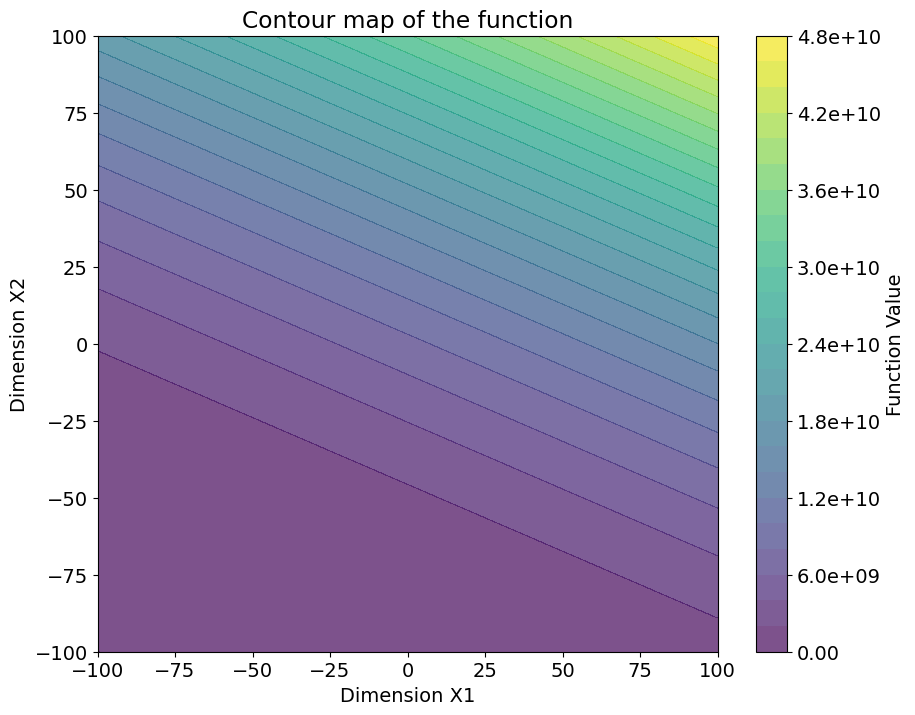

In [47]:
ObjectiveFunction(ndim=2).plot_2d(500)

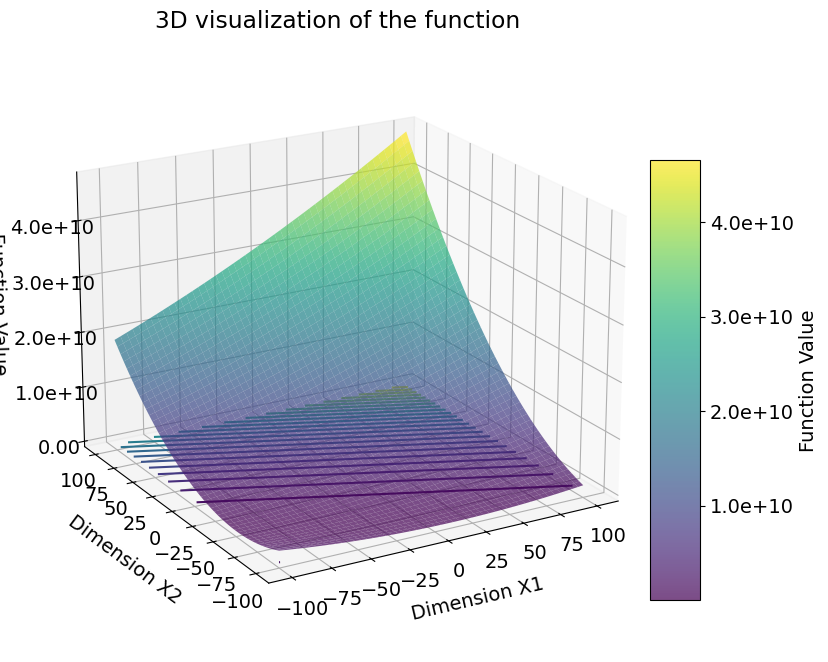

In [48]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [49]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2.835441e+04,2.835441e+04,28354.412664,28354.412664,28354.412664,28354.412664,28354.412664,28354.412664,28354.412664,20405.393516,...,100.501319,100.498532,100.498532,100.498532,100.498532,100.498532,100.498532,100.449390,100.002744,100.002744
1,1.098963e+06,1.098963e+06,279347.815894,279347.815894,279347.815894,25260.877690,6500.320196,2589.843841,2589.843841,2589.843841,...,100.721552,100.721552,100.028936,100.028936,100.028936,100.028936,100.028936,100.028936,100.028936,100.023788
2,4.851165e+06,3.775833e+06,307175.990121,307175.990121,23712.522084,23712.522084,15289.953775,7182.961151,7182.961151,7182.961151,...,101.274497,101.274497,100.025546,100.025546,100.025546,100.025546,100.025546,100.025546,100.025546,100.006560
3,1.056089e+07,6.615904e+04,66159.036574,66159.036574,66159.036574,21287.621140,21287.621140,13851.664809,13851.664809,1070.954232,...,100.945955,100.163606,100.163606,100.163606,100.163606,100.163606,100.057069,100.057069,100.057069,100.057069
4,7.857425e+05,7.857425e+05,439955.686731,270339.653106,47255.643937,47255.643937,22921.408654,22921.408654,14840.811784,14840.811784,...,101.342129,101.342129,101.342129,101.342129,101.342129,101.342129,101.342129,100.358332,100.358332,100.358332
5,3.677853e+06,1.766051e+05,36245.578778,36245.578778,31288.096254,14222.395053,14222.395053,14222.395053,287.751216,287.751216,...,100.065880,100.065880,100.065880,100.065880,100.065880,100.054269,100.054269,100.054269,100.054269,100.054269
6,1.826847e+07,2.940700e+06,151753.334183,151753.334183,151753.334183,1420.543355,1420.543355,1420.543355,1420.543355,1420.543355,...,100.109798,100.109798,100.017499,100.017499,100.017499,100.017499,100.017499,100.017499,100.017499,100.017499
7,9.552451e+05,9.552451e+05,912871.954339,107603.287764,107603.287764,107603.287764,107603.287764,4916.184049,4916.184049,162.994641,...,100.359593,100.359593,100.359593,100.359593,100.341864,100.324152,100.324152,100.020609,100.020609,100.020609
8,3.822357e+06,7.287502e+05,52862.384686,52862.384686,52862.384686,52862.384686,13061.192417,4503.916029,292.318563,292.318563,...,100.267101,100.267101,100.026052,100.026052,100.026052,100.026052,100.026052,100.026052,100.026052,100.026052
9,7.174827e+04,7.174827e+04,71748.265695,2238.470943,2238.470943,2238.470943,2238.470943,2238.470943,2238.470943,2238.470943,...,100.271416,100.271416,100.200829,100.171120,100.171120,100.009203,100.002241,100.002241,100.002241,100.002241


In [50]:
Base.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.189068e+06,1.141162e+06,3.497970e+05,1.384104e+05,5.339561e+04,27979.681975,15761.101280,10903.658050,7226.273893,5522.452030,...,100.760824,100.549469,100.400898,100.294576,100.221029,100.172378,100.132215,100.098296,100.073515,100.053222
std,1.224550e+07,2.403553e+06,8.671743e+05,3.366315e+05,1.027806e+05,48419.058413,21784.830386,15322.909298,8415.943158,6370.943009,...,1.114730,0.821291,0.620256,0.410917,0.281130,0.237837,0.195504,0.157537,0.126043,0.084245
min,1.799928e+02,1.799928e+02,1.799928e+02,1.013494e+02,1.013494e+02,101.349448,101.349448,101.349448,101.349448,101.349448,...,100.000003,100.000003,100.000003,100.000003,100.000003,100.000003,100.000003,100.000003,100.000003,100.000003
25%,2.665121e+05,4.725185e+04,1.938853e+04,9.770362e+03,5.917380e+03,4495.299109,3078.508493,2237.403404,1635.227158,1275.296232,...,100.147097,100.103484,100.073402,100.055236,100.043875,100.033280,100.023447,100.019066,100.013829,100.010396
50%,1.382932e+06,2.746596e+05,7.921784e+04,3.726145e+04,2.002307e+04,12159.608627,7999.619352,5860.885236,4349.301832,3452.928138,...,100.391698,100.291294,100.213915,100.156931,100.119378,100.090482,100.062193,100.046607,100.035145,100.025500
75%,5.075581e+06,1.022496e+06,2.977551e+05,1.258733e+05,5.220373e+04,31435.419887,20965.995899,13857.893055,9513.838471,7355.069389,...,100.933273,100.681559,100.506691,100.368130,100.279474,100.215147,100.157578,100.112439,100.081716,100.060623
max,1.761925e+08,3.186959e+07,1.305460e+07,4.447999e+06,1.253203e+06,737818.692064,178000.231728,178000.231728,67218.510562,53692.625664,...,111.725655,111.725655,111.260461,105.195645,102.279871,102.216595,102.216595,102.216595,102.216595,100.939305


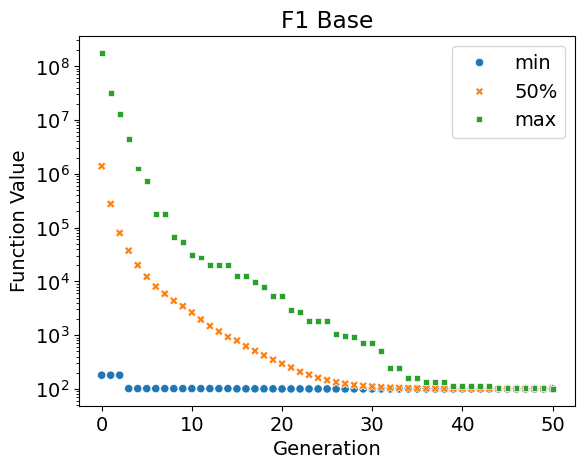

In [71]:
Plot_Min50Max(Base,Scale)

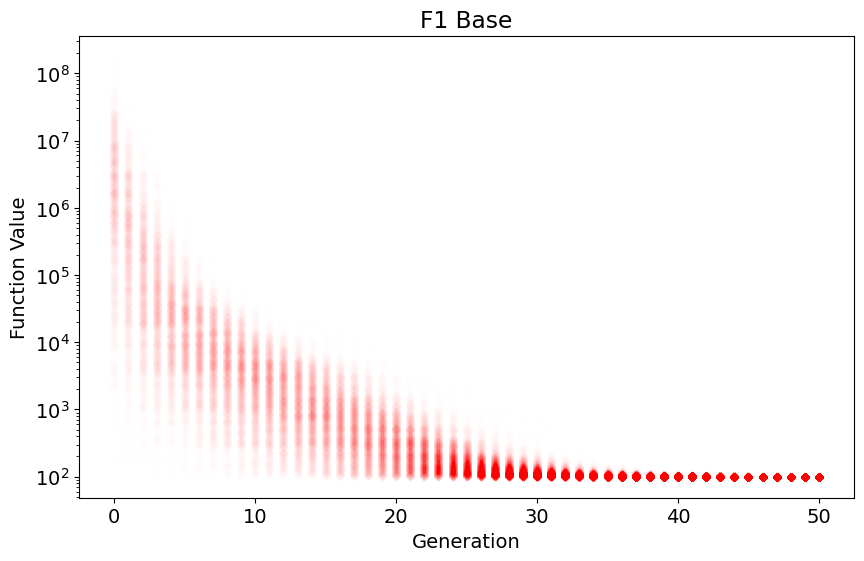

In [ ]:
Plot_Generation_FunctionValues(Base,Scale)

In [79]:
InteractivePlot(Base,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [54]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1.841936e+05,1.841936e+05,184193.596958,184193.596958,37821.798604,15536.405889,15536.405889,15536.405889,10858.992494,10858.992494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.127296e+06,3.045359e+05,304535.894049,5643.027179,5643.027179,5643.027179,5643.027179,5643.027179,5643.027179,5643.027179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.298753e+07,2.441414e+04,17922.028015,17922.028015,17922.028015,17922.028015,17922.028015,17922.028015,17922.028015,7318.205486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.068635e+06,1.214525e+06,65573.544979,14761.819079,14761.819079,14761.819079,6153.336613,6153.336613,3803.542234,3803.542234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.411039e+04,2.411039e+04,24110.390924,24110.390924,24110.390924,7651.881272,7651.881272,7651.881272,7651.881272,7651.881272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.182266e+06,1.182266e+06,973.554011,973.554011,973.554011,973.554011,973.554011,973.554011,973.554011,973.554011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.090599e+07,2.499368e+05,249936.793493,70476.942525,70476.942525,70476.942525,9788.996145,4956.218312,4956.218312,4956.218312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.903265e+06,1.515573e+06,62036.738581,62036.738581,28454.116147,28454.116147,28454.116147,5170.259127,5170.259127,5170.259127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.511333e+05,9.385543e+03,9385.542769,9385.542769,9385.542769,9385.542769,9260.419873,9260.419873,9260.419873,9260.419873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.787375e+05,9.787375e+05,488847.174226,488847.174226,33212.941575,5210.669123,5210.669123,5210.669123,5210.669123,2755.094323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
RandomSample.describe()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,4.818902e+06,1.207129e+06,3.563671e+05,1.266031e+05,5.442277e+04,27575.326604,15586.054922,10130.478164,6803.737154,4970.762489,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
std,9.454341e+06,2.516925e+06,9.003931e+05,2.621882e+05,1.126985e+05,52477.074332,25732.109556,15374.534701,9209.443296,5847.701357,...,3.912996e-11,3.919239e-11,3.743328e-11,3.435944e-11,3.440298e-11,5.245370e-11,1.936688e-11,1.937701e-11,8.041429e-12,8.070853e-12
min,1.579990e+02,1.579990e+02,1.579990e+02,1.579990e+02,1.579990e+02,114.776539,111.791753,104.421939,104.421939,104.421939,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
25%,2.367749e+05,4.760471e+04,1.883282e+04,8.439565e+03,5.123330e+03,3664.057137,2717.129340,2163.795999,1577.698643,1320.450004,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
50%,1.386844e+06,3.050994e+05,7.200956e+04,3.399707e+04,1.871781e+04,11231.942307,7481.230113,5292.039644,3847.908259,2973.615846,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,5.512024e+06,1.106136e+06,3.469998e+05,1.142622e+05,4.913419e+04,29147.844694,18402.800148,12314.658682,8396.443809,6382.680569,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
max,9.295156e+07,2.667091e+07,1.702352e+07,2.491278e+06,1.080413e+06,618912.307311,381763.931250,163667.702685,118087.561328,59808.646542,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


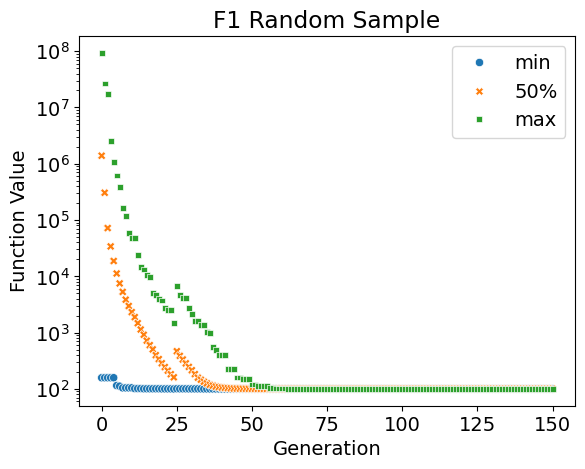

In [81]:
Plot_Min50Max(RandomSample,Scale)

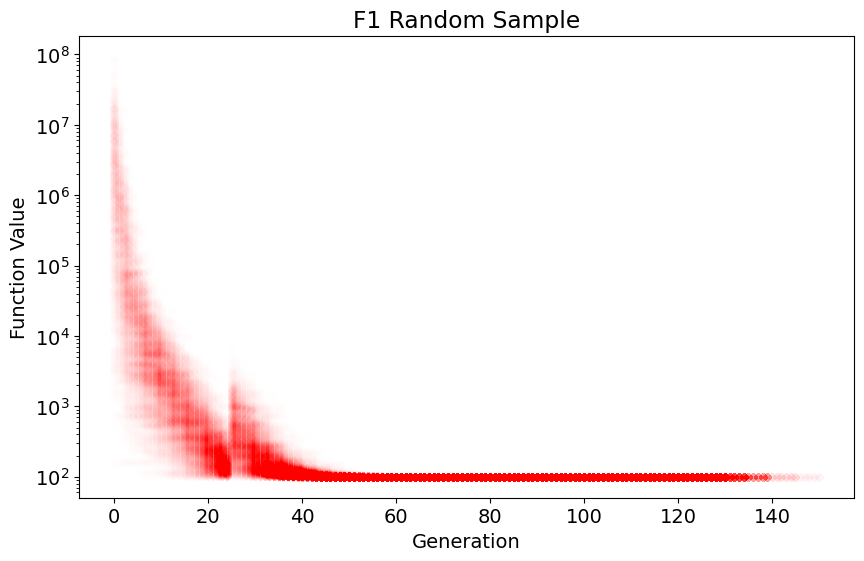

In [ ]:
Plot_Generation_FunctionValues(RandomSample,Scale)

In [83]:
InteractivePlot(RandomSample,Scale)

interactive(children=(IntSlider(value=75, description='generation', max=150), Output()), _dom_classes=('widget…

## Agglomerative

In [59]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,1.583740e+04,1.583740e+04,15837.404473,15837.404473,15837.404473,15837.404473,9223.784905,9223.784905,9223.784905,9223.784905,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2.698218e+07,9.627231e+04,96272.312126,84803.657015,22130.792701,22130.792701,3365.337335,3365.337335,3365.337335,3365.337335,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,4.637851e+06,1.892662e+06,26861.355845,26861.355845,4913.086027,4913.086027,4913.086027,4913.086027,4913.086027,4913.086027,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,3.506393e+04,3.506393e+04,35063.930534,35063.930534,35063.930534,35063.930534,555.173211,555.173211,555.173211,555.173211,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,9.681505e+03,9.681505e+03,9681.505426,9681.505426,9681.505426,9681.505426,9681.505426,9681.505426,9681.505426,9681.505426,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,1.843905e+06,1.843905e+06,341579.765431,141889.786276,2451.908239,2451.908239,2451.908239,2451.908239,2451.908239,2451.908239,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
6,3.389133e+05,3.389133e+05,338913.265782,338913.265782,9550.460826,9550.460826,9550.460826,9550.460826,9550.460826,9550.460826,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
7,5.955877e+05,5.224804e+02,522.480369,522.480369,522.480369,522.480369,522.480369,522.480369,522.480369,522.480369,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,9.679684e+04,9.679684e+04,27881.525830,27881.525830,26468.746232,26468.746232,5551.480744,1585.561041,1585.561041,168.035082,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,1.284440e+06,4.138879e+05,239984.469546,990.236329,990.236329,990.236329,990.236329,990.236329,990.236329,990.236329,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [60]:
Agglomerative.describe()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.560433e+06,1.112491e+06,3.318422e+05,1.316292e+05,6.036668e+04,2.924082e+04,16294.390054,10516.574822,6817.060259,5093.146230,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
std,1.197230e+07,2.714844e+06,8.250031e+05,3.016065e+05,1.336991e+05,6.840989e+04,26839.741387,16307.550359,8453.329146,6102.488787,...,6.088226e-08,6.088025e-08,6.087918e-08,6.086658e-08,6.079226e-08,6.031374e-08,6.030954e-08,6.030377e-08,6.030317e-08,6.030317e-08
min,2.576526e+02,2.054521e+02,2.054521e+02,1.496875e+02,1.297290e+02,1.297290e+02,129.728963,106.148557,106.148557,100.294422,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
25%,1.916927e+05,4.111146e+04,1.798674e+04,9.480178e+03,5.928858e+03,4.267428e+03,3075.538547,2199.995017,1593.947956,1248.489177,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
50%,1.253257e+06,2.428525e+05,7.732746e+04,3.626244e+04,1.942732e+04,1.149027e+04,7320.332756,5325.809412,3944.568870,3209.456304,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,5.462529e+06,9.680267e+05,2.965696e+05,1.191005e+05,5.491460e+04,3.061946e+04,18497.043428,12222.828795,8524.648763,6378.888596,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
max,1.783439e+08,4.205792e+07,1.314588e+07,4.535842e+06,2.035967e+06,1.440592e+06,254260.698649,204600.675951,61028.548186,56502.393483,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


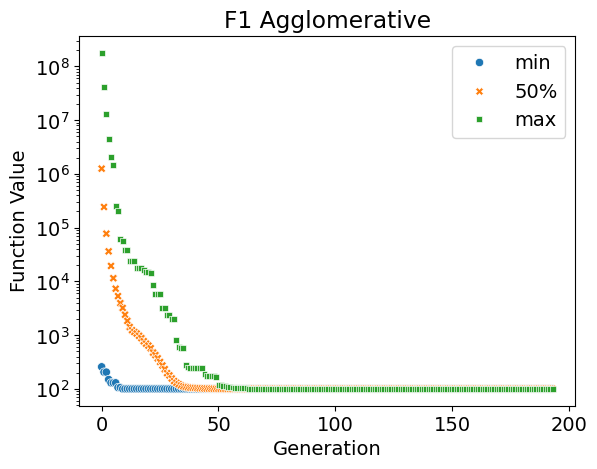

In [87]:
Plot_Min50Max(Agglomerative,Scale)

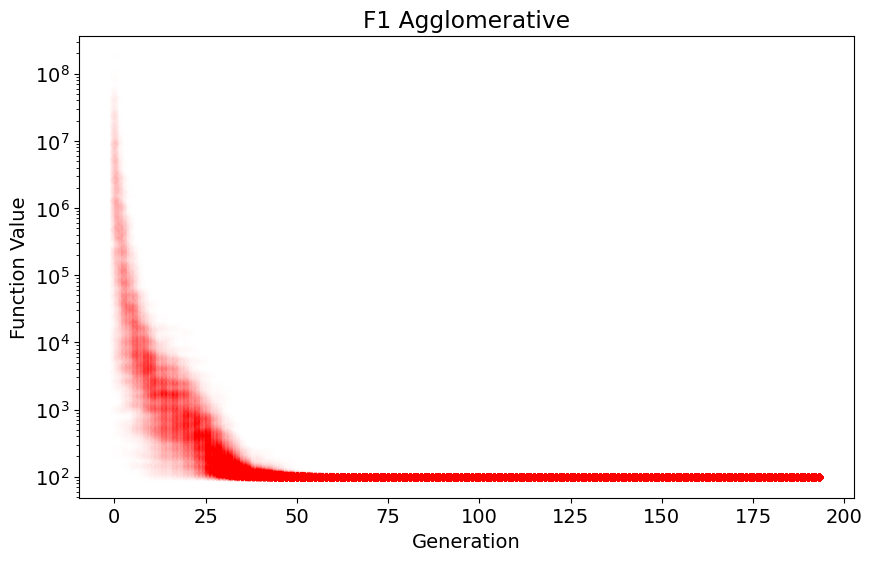

In [88]:
Plot_Generation_FunctionValues(Agglomerative,Scale)

In [89]:
InteractivePlot(Agglomerative,Scale)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [64]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,3.626186e+05,3.626186e+05,3.626186e+05,13324.905050,13324.905050,13324.905050,13324.905050,158.418044,158.418044,158.418044,...,100.063898,100.063898,100.063898,100.063898,100.063898,100.063898,100.063898,100.063898,100.063898,100.002771
1,1.775978e+06,7.082250e+05,3.841998e+05,293589.445589,112997.517448,112997.517448,112997.517448,9105.739943,9105.739943,9105.739943,...,101.319740,101.319740,101.319740,100.017909,100.017909,100.017909,100.017909,100.017909,100.017909,100.017909
2,7.772451e+06,1.335699e+06,1.335699e+06,383352.920054,25394.960261,25394.960261,25394.960261,25394.960261,906.804848,906.804848,...,100.029700,100.029700,100.029700,100.029700,100.029700,100.029700,100.029700,100.029700,100.029700,100.029700
3,9.139212e+06,2.959885e+05,2.959885e+05,279291.924050,133564.995201,113005.832957,5310.939826,3788.647402,3788.647402,3788.647402,...,100.342628,100.342628,100.342628,100.197714,100.197714,100.115233,100.115233,100.047889,100.032984,100.032984
4,1.542151e+05,1.542151e+05,1.280929e+05,17335.861345,17335.861345,6105.375718,6105.375718,6105.375718,6105.375718,528.406782,...,100.067928,100.067928,100.067928,100.067928,100.067928,100.067928,100.067928,100.067928,100.040887,100.040887
5,5.304240e+05,5.304240e+05,5.304240e+05,530424.047594,4056.347511,4056.347511,4056.347511,3094.777332,3094.777332,1960.679146,...,100.487082,100.487082,100.487082,100.112030,100.112030,100.032768,100.032768,100.032768,100.020950,100.020950
6,1.489702e+08,1.579516e+06,6.998972e+05,210690.255509,146212.415145,63074.917385,23765.293101,12920.850529,12920.850529,1847.350057,...,100.693939,100.693939,100.244324,100.186404,100.186404,100.186404,100.186404,100.005387,100.005387,100.000578
7,6.530406e+06,1.247134e+06,1.774648e+05,44489.964996,21908.982055,21908.982055,21908.982055,7248.502284,7248.502284,7248.502284,...,100.193983,100.193983,100.142718,100.142718,100.142718,100.142718,100.047531,100.031828,100.001917,100.001917
8,1.448355e+05,1.448355e+05,1.070989e+04,10709.889461,10709.889461,718.465850,718.465850,718.465850,718.465850,718.465850,...,102.253794,102.253794,100.486136,100.486136,100.486136,100.290829,100.290829,100.033104,100.033104,100.033104
9,1.639684e+06,4.092583e+05,1.824543e+05,30170.312296,5401.995700,5401.995700,5401.995700,5401.995700,5401.995700,5401.995700,...,100.325068,100.325068,100.325068,100.325068,100.325068,100.325068,100.325068,100.154910,100.154910,100.154910


In [65]:
RandomParameters.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.095314e+06,1.145597e+06,3.514265e+05,1.324419e+05,5.575258e+04,2.997011e+04,16276.461174,10169.087550,7190.674348,5089.193855,...,100.732722,100.540043,100.422527,100.309279,100.235215,100.167353,100.129210,100.096254,100.070958,100.053951
std,1.689491e+07,2.459156e+06,8.722853e+05,3.581917e+05,1.178621e+05,6.770440e+04,26178.993532,14325.898467,10136.159364,6040.663704,...,1.018327,0.710983,0.618093,0.435400,0.347003,0.233937,0.183163,0.140022,0.104954,0.087606
min,2.051694e+02,2.051694e+02,1.771074e+02,1.064507e+02,1.064507e+02,1.064507e+02,106.450660,106.450660,106.450660,101.252697,...,100.000132,100.000132,100.000132,100.000132,100.000132,100.000132,100.000132,100.000132,100.000132,100.000037
25%,2.426560e+05,5.214009e+04,2.102353e+04,1.107187e+04,6.321247e+03,4.048813e+03,2860.207361,2024.389107,1637.119210,1251.790610,...,100.139470,100.102565,100.079506,100.060741,100.046311,100.036014,100.026387,100.020763,100.014343,100.010005
50%,1.395678e+06,2.519473e+05,8.213265e+04,3.663180e+04,1.824014e+04,1.160590e+04,7545.093639,5401.697803,3835.229795,3040.234228,...,100.379771,100.286592,100.221752,100.149643,100.115667,100.086155,100.066194,100.047775,100.036167,100.026041
75%,5.212767e+06,1.051536e+06,2.945088e+05,1.099771e+05,5.110603e+04,3.100719e+04,18926.220434,12251.785272,9006.946580,6702.948188,...,100.921856,100.688427,100.503218,100.373818,100.279132,100.209796,100.160703,100.118525,100.083977,100.059358
max,3.373243e+08,2.563567e+07,1.129099e+07,7.565004e+06,1.421917e+06,1.357085e+06,272108.868157,142954.016198,109071.211437,55002.677822,...,113.143701,108.032714,108.032714,104.508560,104.508560,102.262728,101.867871,101.562884,101.227662,101.123598


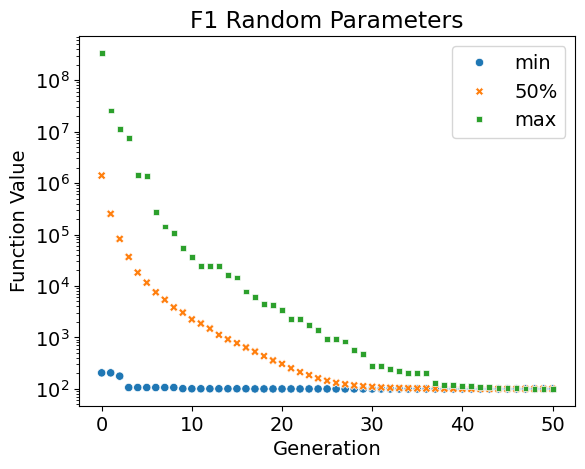

In [90]:
Plot_Min50Max(RandomParameters,Scale)

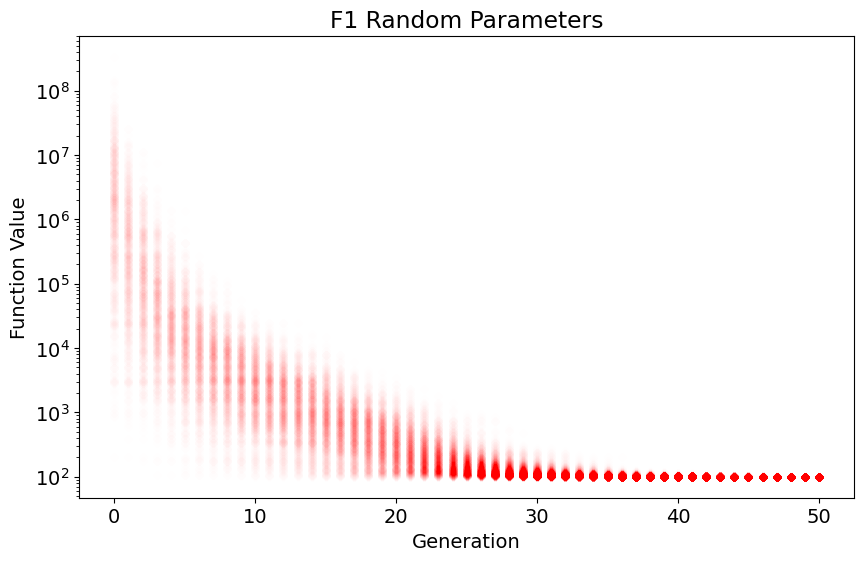

In [91]:
Plot_Generation_FunctionValues(RandomParameters,Scale)

In [92]:
InteractivePlot(RandomParameters,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

# Function 9

In [93]:
NumberFunction = '8'

## Function Plot

In [94]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

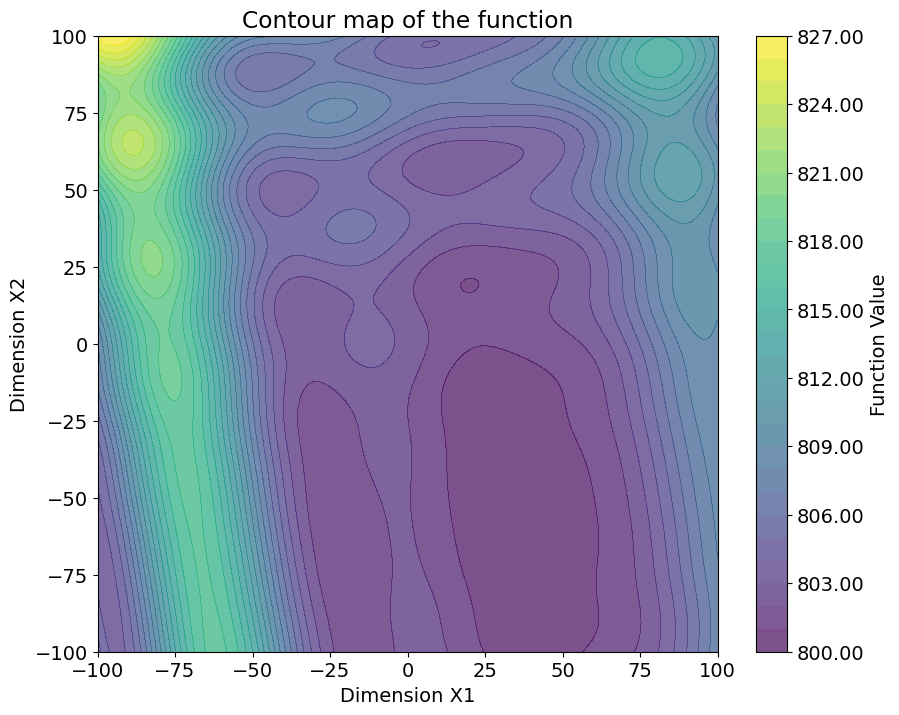

In [95]:
ObjectiveFunction(ndim=2).plot_2d(500)

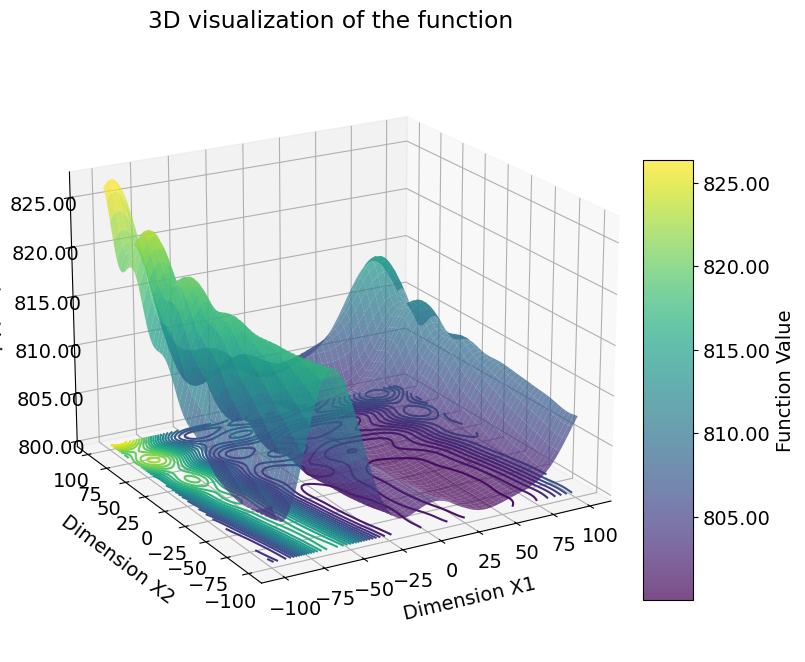

In [96]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [97]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,800.006051,800.004262,800.004262,800.004262,800.004262,800.003794,800.003794,800.002601,800.000223,800.000223,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
1,800.238488,800.122569,800.096728,800.042077,800.004167,800.000452,800.000452,800.000452,800.000452,800.000452,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
2,800.111772,800.062649,800.011019,800.011019,800.004862,800.004862,800.000400,800.000400,800.000400,800.000098,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
3,800.007917,800.007917,800.007917,800.007917,800.007917,800.007917,800.007917,800.005071,800.000573,800.000573,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
4,800.202064,800.114402,800.083376,800.025258,800.025258,800.003740,800.001857,800.001356,800.001356,800.000476,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
5,800.082751,800.082751,800.071672,800.071672,800.071672,800.003665,800.003665,800.003665,800.000933,800.000153,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
6,800.108525,800.068720,800.008461,800.008461,800.008461,800.008461,800.004352,800.003405,800.003405,800.002078,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
7,800.144060,800.144060,800.062533,800.019193,800.019193,800.000916,800.000916,800.000420,800.000420,800.000420,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
8,800.146963,800.129957,800.022517,800.022517,800.010224,800.009472,800.007553,800.000599,800.000599,800.000599,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
9,800.033559,800.033559,800.033559,800.021038,800.000426,800.000426,800.000426,800.000426,800.000426,800.000426,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0


In [98]:
Base.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,800.102242,800.055976,800.031438,800.017939,800.010428,800.005652,800.003446,800.002056,800.001285,800.000768,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
std,0.092208,0.058569,0.034394,0.020966,0.012894,0.006578,0.004364,0.002486,0.001555,0.000871,...,2.578893e-10,1.925799e-10,1.059157e-10,6.397433e-11,4.278555e-11,2.226712e-11,1.415613e-11,7.814584e-12,5.805029e-12,3.911977e-12
min,800.000056,800.000003,800.000003,800.000003,800.000003,800.000002,800.000002,800.000002,800.000002,800.000000,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
25%,800.029777,800.013783,800.007739,800.003900,800.002325,800.001394,800.000847,800.000523,800.000346,800.000198,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
50%,800.073741,800.035312,800.019556,800.011202,800.006085,800.003427,800.002101,800.001304,800.000821,800.000478,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
75%,800.155547,800.079243,800.043284,800.022898,800.013900,800.007315,800.004387,800.002604,800.001593,800.001063,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
max,800.702548,800.350968,800.222158,800.177034,800.133095,800.041249,800.040493,800.025988,800.014558,800.007673,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02


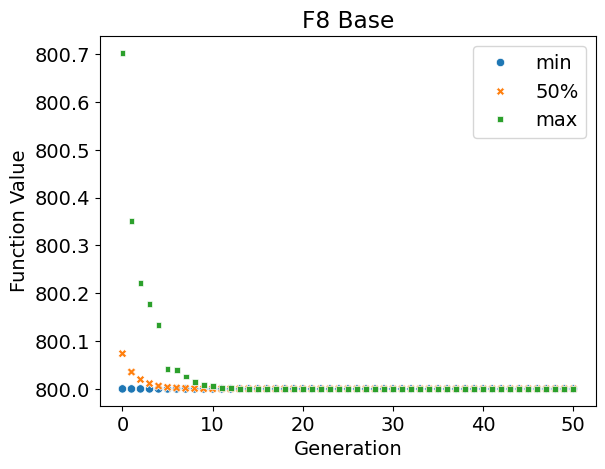

In [99]:
Plot_Min50Max(Base)

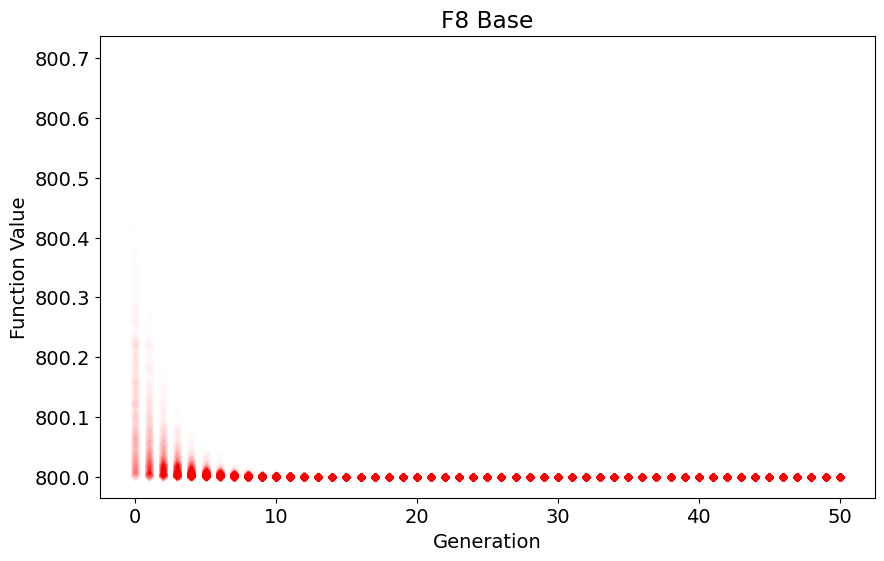

In [100]:
Plot_Generation_FunctionValues(Base)

In [101]:
InteractivePlot(Base)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [102]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,800.054653,800.054653,800.023376,800.023376,800.023376,800.003513,800.003513,800.000405,800.000405,800.000089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,800.203012,800.203012,800.203012,800.027357,800.007554,800.007554,800.007554,800.000871,800.000871,800.000871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,800.009401,800.009401,800.009401,800.009401,800.004152,800.000834,800.000834,800.000492,800.000492,800.000492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,800.268634,800.143115,800.024515,800.004678,800.004678,800.002031,800.002031,800.001069,800.001069,800.001069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,800.021085,800.021085,800.021085,800.021085,800.021085,800.008405,800.001213,800.001213,800.000840,800.000588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,800.166734,800.000472,800.000472,800.000472,800.000472,800.000472,800.000472,800.000472,800.000472,800.000111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,800.113801,800.113801,800.096628,800.069543,800.018920,800.018920,800.006449,800.006449,800.001357,800.001357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,800.103249,800.103249,800.064939,800.012080,800.012080,800.012080,800.012080,800.000248,800.000248,800.000248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,800.295026,800.093211,800.093211,800.093211,800.093211,800.066177,800.006074,800.002089,800.002089,800.000542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,800.087991,800.087991,800.035603,800.035603,800.035603,800.010597,800.010597,800.008066,800.001894,800.001553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
RandomSample.describe()

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,800.105873,800.058957,800.034791,800.019098,800.010841,800.006208,800.003564,800.002207,800.001300,800.000788,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
std,0.093118,0.059695,0.037278,0.022733,0.012648,0.007270,0.004115,0.002725,0.001417,0.000854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,800.000177,800.000177,800.000010,800.000007,800.000007,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
25%,800.029237,800.015146,800.008425,800.004301,800.002596,800.001477,800.000875,800.000566,800.000322,800.000203,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
50%,800.079455,800.039580,800.023206,800.011530,800.006361,800.003709,800.002252,800.001377,800.000821,800.000509,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
75%,800.165974,800.080182,800.048298,800.025045,800.014860,800.008373,800.004672,800.002899,800.001806,800.001044,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
max,800.500362,800.500362,800.249682,800.216757,800.104122,800.066177,800.038029,800.030901,800.008636,800.007563,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0


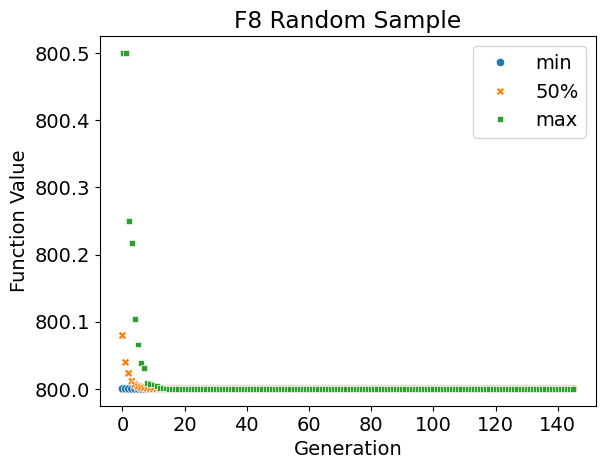

In [104]:
Plot_Min50Max(RandomSample)

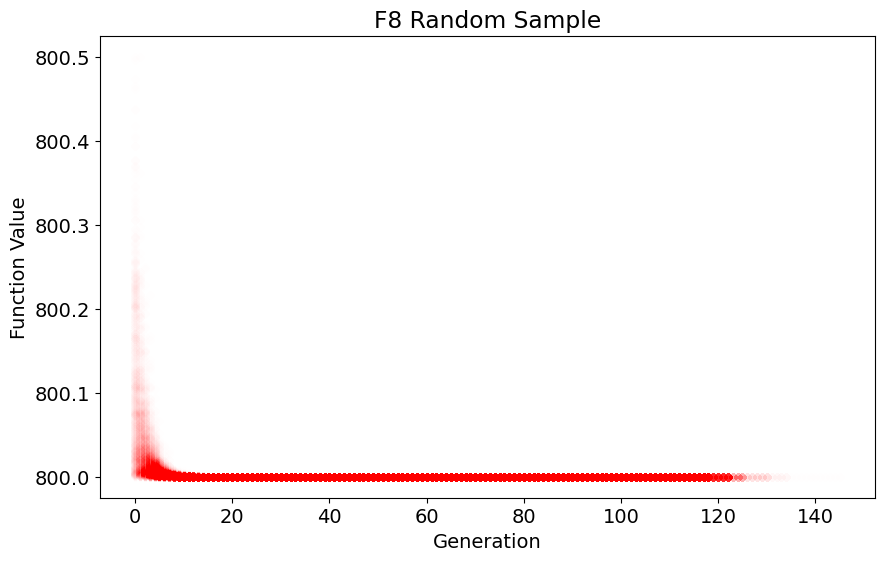

In [105]:
Plot_Generation_FunctionValues(RandomSample)

In [106]:
InteractivePlot(RandomSample)

interactive(children=(IntSlider(value=72, description='generation', max=145), Output()), _dom_classes=('widget…

## Agglomerative

In [117]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,800.224952,800.224952,800.015365,800.015365,800.007424,800.006528,800.006144,800.003594,800.001856,800.001579,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
1,800.030671,800.030671,800.030671,800.030671,800.030671,800.008966,800.002207,800.000438,800.000438,800.000126,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
2,800.170891,800.000890,800.000890,800.000890,800.000890,800.000890,800.000890,800.000890,800.000890,800.000890,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
3,800.000981,800.000981,800.000981,800.000981,800.000981,800.000981,800.000981,800.000981,800.000981,800.000654,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
4,800.074539,800.074539,800.050900,800.050900,800.019203,800.008335,800.008335,800.004907,800.003131,800.000135,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
5,800.042398,800.042398,800.002882,800.002882,800.002882,800.002882,800.002882,800.002882,800.002882,800.000021,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
6,800.006775,800.006775,800.006775,800.006775,800.006775,800.006775,800.001102,800.001102,800.000359,800.000359,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
7,800.163265,800.060358,800.005380,800.005380,800.005380,800.001491,800.001491,800.000825,800.000375,800.000375,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
8,800.061724,800.061724,800.010355,800.007016,800.007016,800.002325,800.000918,800.000918,800.000584,800.000159,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
9,800.032417,800.032417,800.004949,800.004949,800.004949,800.004949,800.002055,800.000756,800.000756,800.000756,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0


In [118]:
Agglomerative.describe()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,800.106020,800.058372,800.032725,800.018763,800.011139,800.006320,800.003699,800.002214,800.001362,800.000825,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
std,0.096525,0.058761,0.036386,0.022187,0.013616,0.007098,0.004054,0.002581,0.001542,0.000962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,800.000084,800.000033,800.000033,800.000006,800.000006,800.000006,800.000000,800.000000,800.000000,800.000000,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
25%,800.028900,800.013493,800.007457,800.004333,800.002789,800.001754,800.000921,800.000580,800.000363,800.000212,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
50%,800.077375,800.039456,800.020764,800.011438,800.006937,800.004150,800.002322,800.001424,800.000829,800.000537,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
75%,800.164438,800.083743,800.044296,800.025165,800.014248,800.008576,800.004964,800.002882,800.001833,800.001044,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
max,800.699245,800.351865,800.240237,800.231718,800.166287,800.075213,800.030183,800.023862,800.012152,800.008516,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0


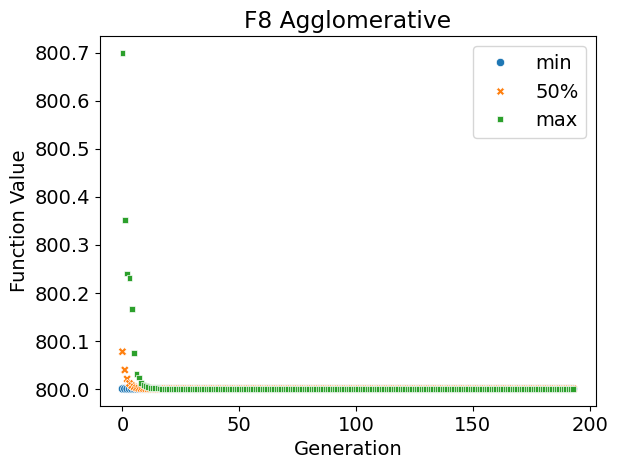

In [119]:
Plot_Min50Max(Agglomerative)

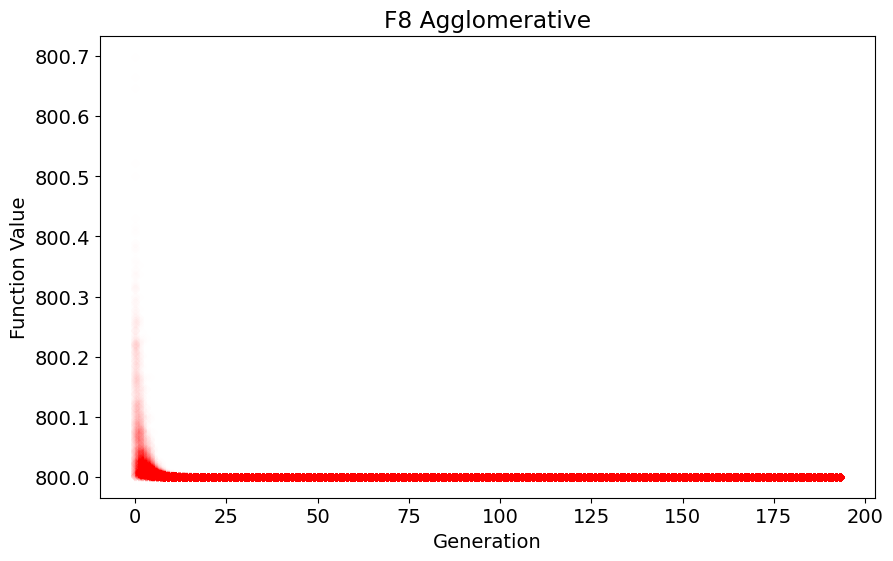

In [120]:
Plot_Generation_FunctionValues(Agglomerative)

In [121]:
InteractivePlot(Agglomerative)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [122]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,800.053573,800.053573,800.024193,800.019849,800.006250,800.006250,800.001409,800.001409,800.001206,800.001206,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
1,800.133007,800.010535,800.010535,800.010535,800.010535,800.000867,800.000867,800.000105,800.000105,800.000105,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
2,800.244231,800.018403,800.013959,800.013959,800.006600,800.000754,800.000754,800.000754,800.000754,800.000754,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
3,800.044874,800.044874,800.011995,800.011995,800.011995,800.008269,800.003122,800.001369,800.000204,800.000204,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
4,800.178831,800.178831,800.044919,800.044919,800.010364,800.010364,800.010364,800.010364,800.001618,800.001618,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
5,800.188156,800.104594,800.036538,800.004307,800.002350,800.000682,800.000682,800.000682,800.000682,800.000682,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
6,800.054876,800.054876,800.054876,800.054876,800.007285,800.000442,800.000442,800.000442,800.000442,800.000069,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
7,800.055828,800.055828,800.027919,800.027919,800.012615,800.003602,800.002087,800.002087,800.001057,800.001057,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
8,800.097986,800.071765,800.049838,800.034709,800.003733,800.003733,800.000193,800.000193,800.000116,800.000116,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
9,800.106866,800.042756,800.042756,800.005985,800.005985,800.002264,800.002264,800.002264,800.000707,800.000135,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0


In [123]:
RandomParameters.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,800.100503,800.054998,800.030530,800.017613,800.009937,800.005724,800.003293,800.002006,800.001266,800.000802,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
std,0.086554,0.056092,0.035280,0.021330,0.011638,0.006771,0.004139,0.002157,0.001372,0.000945,...,2.697594e-10,1.731358e-10,1.246505e-10,8.851678e-11,4.144863e-11,2.787446e-11,1.873949e-11,1.102956e-11,6.567719e-12,4.569711e-12
min,800.000137,800.000047,800.000006,800.000006,800.000006,800.000006,800.000004,800.000004,800.000002,800.000001,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
25%,800.031074,800.013407,800.007089,800.003972,800.002546,800.001295,800.000742,800.000510,800.000328,800.000181,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
50%,800.074640,800.036041,800.018340,800.010622,800.006155,800.003537,800.002025,800.001295,800.000773,800.000498,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
75%,800.155748,800.077901,800.041627,800.022476,800.012868,800.007427,800.004248,800.002842,800.001747,800.001032,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
max,800.530829,800.318774,800.259033,800.196045,800.103943,800.049230,800.043477,800.020770,800.009483,800.008508,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02


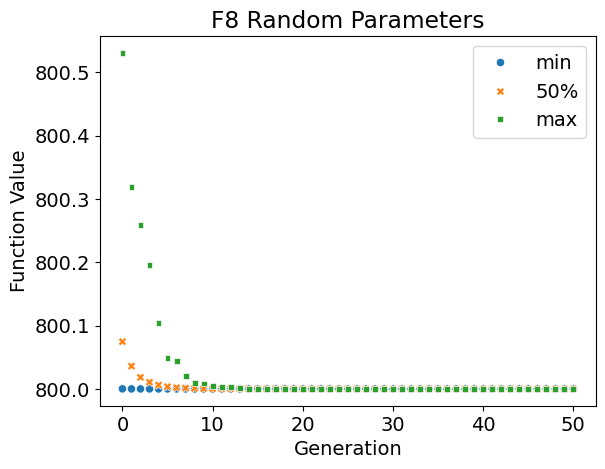

In [124]:
Plot_Min50Max(RandomParameters)

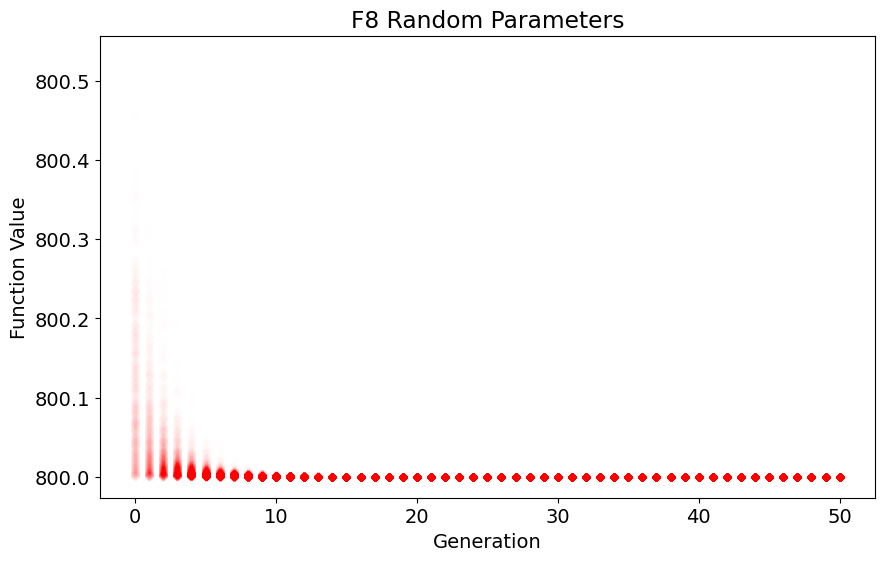

In [125]:
Plot_Generation_FunctionValues(RandomParameters)

In [126]:
InteractivePlot(RandomParameters)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

# Function 9

In [8]:
NumberFunction = '9'

## Function Plot

In [9]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

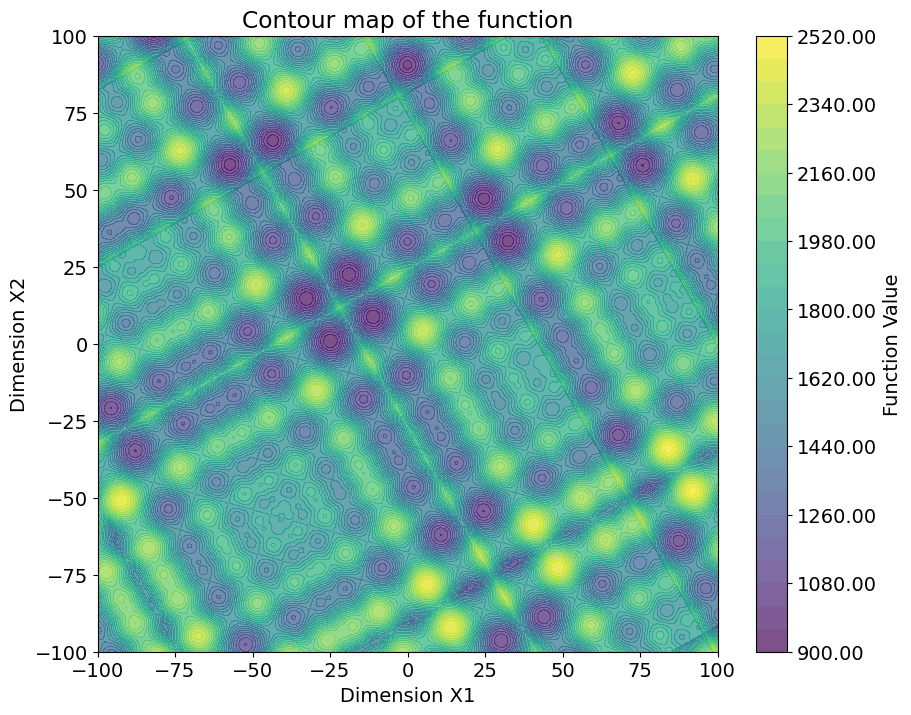

In [10]:
ObjectiveFunction(ndim=2).plot_2d(500)

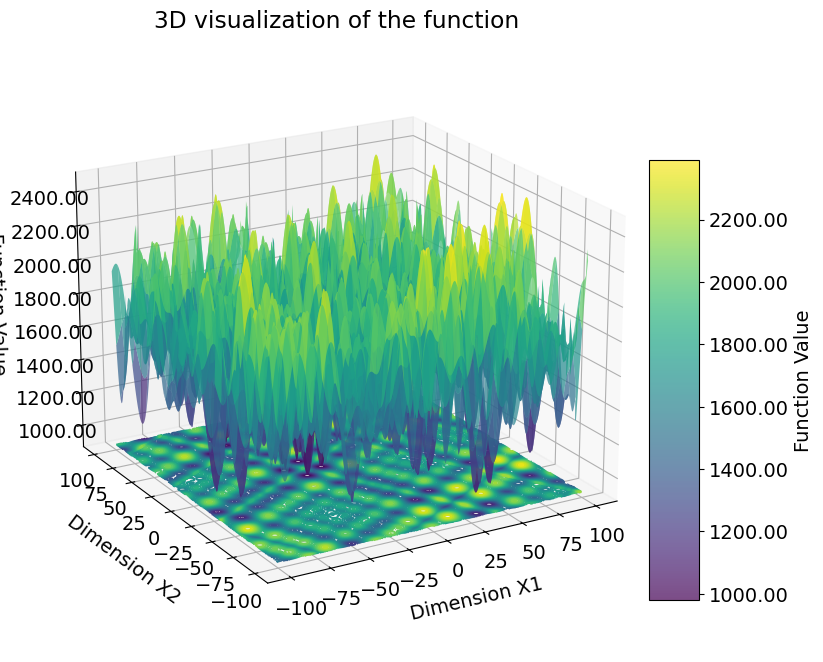

In [11]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [25]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1132.505601,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,...,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502
1,948.840393,948.840393,948.840393,948.840393,948.840393,947.888463,947.888463,947.888463,947.888463,947.888463,...,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941
2,1125.011391,1125.011391,1100.315202,1030.499116,1030.499116,1029.827303,929.442612,929.442612,929.442612,929.442612,...,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473
3,998.117018,998.117018,998.117018,973.210627,973.210627,973.210627,973.210627,973.210627,973.210627,973.210627,...,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482
4,961.987637,961.987637,961.987637,961.987637,961.987637,961.987637,920.667239,920.667239,920.667239,920.667239,...,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,901.762082
5,955.968214,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,...,911.113142,911.113142,911.113142,911.113142,911.113142,911.113142,911.039504,911.039504,911.039504,911.039504
6,1043.658112,1043.658112,918.487992,918.487992,918.487992,918.487992,918.487992,918.487992,918.487992,905.074452,...,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452
7,1101.495819,1101.495819,984.360244,984.360244,984.360244,984.360244,984.360244,984.360244,984.360244,966.075688,...,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367
8,988.898689,988.898689,988.898689,971.787642,971.787642,948.069809,948.069809,948.069809,909.100872,909.100872,...,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687
9,1012.542622,980.787206,980.787206,980.215462,980.215462,980.215462,980.215462,980.215462,920.325061,920.325061,...,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273


In [13]:
Base.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1026.280862,981.980077,964.994683,953.510327,946.697389,940.986519,936.678705,931.836842,929.312947,926.733937,...,905.543384,905.385201,905.152570,905.001519,904.827975,904.657546,904.522066,904.427102,904.258391,904.122577
std,76.215663,55.114888,44.413507,37.581466,34.021471,30.663658,27.460348,23.820017,21.804465,20.192959,...,5.445952,5.304563,5.121166,4.961931,4.875001,4.726902,4.622544,4.524896,4.324569,4.250219
min,901.143757,900.026393,900.026393,900.026393,900.026393,900.026393,900.026393,900.026393,900.026393,900.024816,...,900.015037,900.002634,900.002634,900.002634,900.002634,900.002634,900.002634,900.002634,900.002634,900.002634
25%,963.169855,938.094634,931.253683,924.730188,921.569546,918.833111,917.345303,914.940804,913.778027,911.850927,...,901.669214,901.634038,901.567652,901.510200,901.445034,901.410844,901.387826,901.371103,901.344925,901.307693
50%,1019.127120,970.198103,957.398595,945.565675,939.364754,934.146738,930.144594,926.658748,924.432678,922.596538,...,903.582248,903.510777,903.425157,903.336007,903.222098,903.093568,902.983760,902.930394,902.848688,902.719816
75%,1080.025452,1017.998807,992.309151,974.290910,964.296573,957.591185,950.995958,943.503403,940.040476,936.745298,...,907.449238,907.189373,906.694982,906.566959,906.287850,905.987214,905.828907,905.725839,905.307202,905.083653
max,1262.846689,1192.549790,1118.947703,1106.380649,1084.679216,1084.679216,1053.146085,1053.146085,1026.403981,1026.403981,...,928.536747,928.536747,928.536747,928.536747,928.063859,928.023464,928.023464,928.023464,925.504755,925.504755


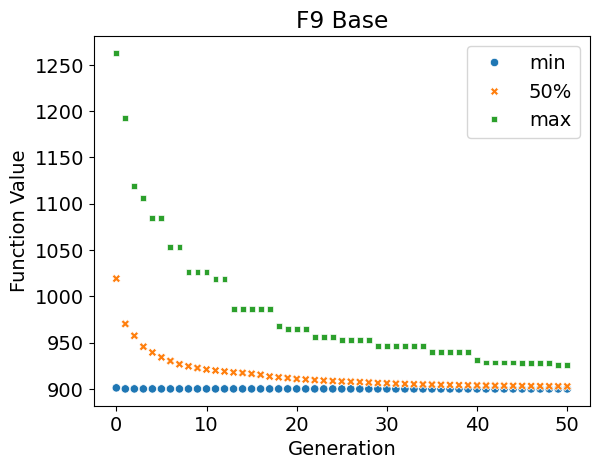

In [27]:
Plot_Min50Max(Base)

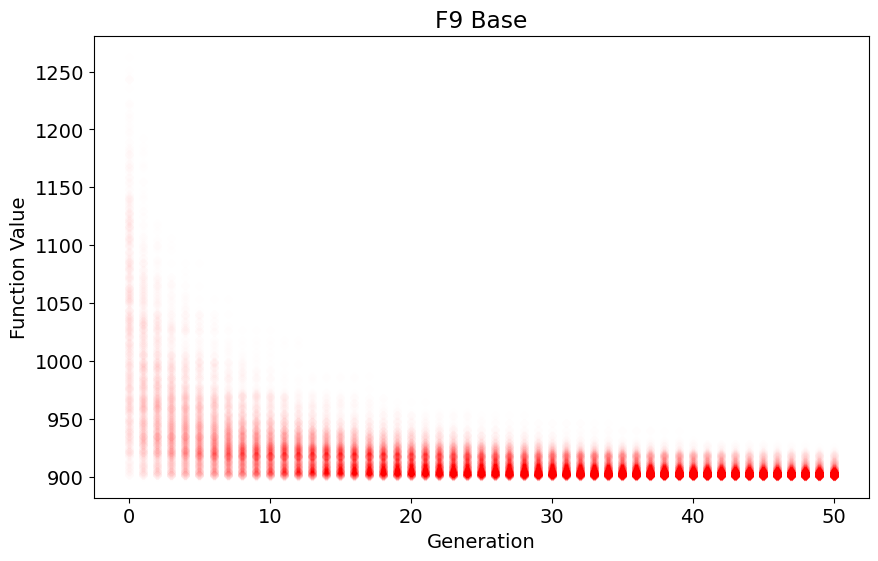

In [28]:
Plot_Generation_FunctionValues(Base)

In [29]:
InteractivePlot(Base)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [30]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,1203.922828,1022.081577,980.464034,980.464034,980.464034,980.464034,980.464034,980.464034,980.464034,939.804597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,972.928684,972.928684,972.928684,972.928684,972.928684,949.159203,949.159203,949.159203,943.134132,943.134132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,927.040012,927.040012,927.040012,927.040012,923.472476,923.472476,923.472476,923.472476,923.472476,923.472476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1011.810493,1000.091767,981.600672,981.600672,981.600672,939.030042,920.852262,920.852262,920.852262,920.852262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,968.632764,963.063390,911.518520,911.518520,911.518520,911.518520,911.518520,911.518520,911.518520,911.518520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,997.883522,969.307494,969.307494,922.827068,922.827068,922.827068,922.827068,922.827068,922.827068,922.827068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.365429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1053.467248,1053.467248,928.403282,928.403282,928.403282,928.403282,928.403282,928.403282,928.403282,928.403282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,999.845474,936.449992,936.449992,933.877062,933.877062,933.877062,933.877062,933.877062,933.877062,933.877062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1001.889997,977.336281,977.336281,977.336281,958.699243,958.699243,920.877198,920.877198,920.877198,920.877198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
RandomSample.describe()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,32.000000,32.000000,32.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.000000,2.000000
mean,1026.997526,986.104627,965.532190,953.752877,946.351680,940.382721,935.889857,932.154583,929.491401,926.684601,...,902.048216,901.985371,901.980262,901.285170,901.221147,901.207461,901.191253,900.377360,900.377360,900.377360
std,77.429955,57.083481,45.669540,39.744062,34.579948,30.807372,27.821530,25.552511,24.009738,21.899922,...,4.182949,4.130714,4.132424,1.507742,1.517944,1.522856,1.530827,0.092188,0.092188,0.092188
min,900.966567,900.966567,900.828636,900.552662,900.346034,900.346034,900.346034,900.346034,900.026170,900.026170,...,900.000235,900.000152,900.000152,900.108389,900.108389,900.108389,900.108389,900.312173,900.312173,900.312173
25%,964.872606,938.889977,928.668074,921.820989,919.491138,917.402045,915.772677,912.819812,911.617877,910.457862,...,900.312913,900.312912,900.312912,900.312504,900.312504,900.312186,900.312186,900.344767,900.344767,900.344767
50%,1022.463833,976.811504,956.678802,944.096691,937.549393,933.628740,929.796358,926.228258,923.371904,921.558844,...,900.624348,900.624347,900.598932,900.658383,900.625405,900.625405,900.544366,900.377360,900.377360,900.377360
75%,1076.310489,1025.511899,995.028947,978.369088,965.750106,956.766612,949.398837,943.845479,940.436285,936.663484,...,901.508707,901.374389,901.374389,901.294493,901.001688,900.967790,900.967790,900.409953,900.409953,900.409953
max,1312.176979,1237.455367,1142.090093,1116.813182,1080.026373,1080.026373,1070.032195,1070.032195,1032.306583,1029.592267,...,921.405267,921.405267,921.405267,904.466326,904.466326,904.466326,904.466326,900.442547,900.442547,900.442547


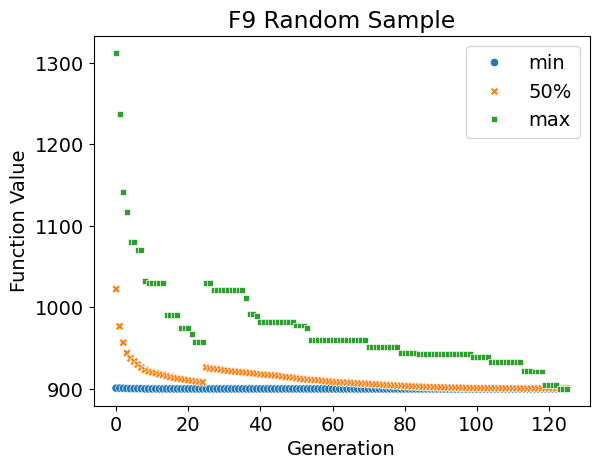

In [32]:
Plot_Min50Max(RandomSample)

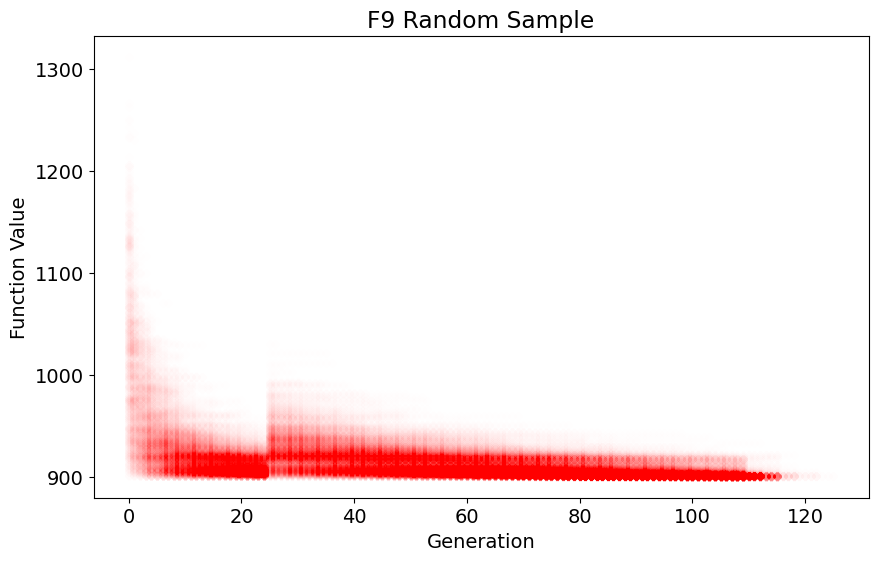

In [33]:
Plot_Generation_FunctionValues(RandomSample)

In [34]:
InteractivePlot(RandomSample)

interactive(children=(IntSlider(value=62, description='generation', max=125), Output()), _dom_classes=('widget…

## Agglomerative

In [35]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,926.680177,926.680177,926.680177,926.680177,906.761843,906.761843,906.761843,906.761843,906.761843,906.761843,...,900.000001,900.000001,900.000001,900.000001,900.000001,900.000001,900.000000,900.000000,900.000000,900.000000
1,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,...,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321
2,1034.711927,1001.520647,1001.520647,1001.520647,936.887384,936.887384,936.887384,936.887384,936.887384,936.887384,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
3,1090.599393,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
4,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,...,900.898677,900.898677,900.898677,900.779570,900.779570,900.779570,900.754891,900.671902,900.633516,900.633516
5,1007.643604,1007.643604,1007.643604,1002.578186,962.921116,962.921116,962.921116,962.921116,962.921116,919.297540,...,900.333848,900.192484,900.178000,900.178000,900.148453,900.110148,900.074743,900.065018,900.065018,900.065018
6,1061.157044,942.628480,942.628480,942.628480,942.628480,928.363589,928.363589,928.363589,928.363589,909.445207,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
7,1049.595360,1049.595360,1049.595360,1049.595360,1020.426060,1020.426060,1003.164201,1003.164201,1003.164201,1003.164201,...,900.329629,900.329571,900.329566,900.329505,900.329505,900.329505,900.329492,900.329492,900.329455,900.329412
8,1011.567447,976.817134,976.817134,938.623933,938.623933,938.623933,938.623933,938.623933,938.623933,938.623933,...,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347
9,1018.123903,1018.123903,1018.123903,1016.001146,924.383066,924.383066,924.383066,924.383066,924.383066,924.383066,...,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526


In [36]:
Agglomerative.describe()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1025.835859,982.257142,963.322102,952.429344,943.818512,938.143854,933.871877,930.361601,928.022226,925.738890,...,901.384412,901.365952,901.347656,901.331041,901.299519,901.291302,901.285108,901.277047,901.264811,901.264317
std,76.665806,55.417608,45.667689,38.703804,32.744766,28.999126,25.463587,23.272728,21.536094,20.029232,...,3.307257,3.262884,3.241355,3.232829,3.153782,3.152148,3.145090,3.139810,3.131292,3.131263
min,900.479663,900.479663,900.452135,900.452135,900.409834,900.409834,900.345435,900.345435,900.345435,900.345435,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
25%,960.922140,937.733589,927.891000,922.767276,919.796056,917.091941,914.649089,912.534452,911.388520,909.854846,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
50%,1022.179066,972.433856,952.519254,943.627790,936.907719,931.938182,928.694905,926.047793,923.903374,921.921381,...,900.312179,900.312177,900.312175,900.312174,900.312174,900.312174,900.312173,900.312173,900.312173,900.312173
75%,1079.023796,1022.469665,988.612057,972.941329,960.895828,952.300341,947.485566,942.054161,938.888896,935.453572,...,900.624351,900.624348,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347
max,1262.855520,1166.786355,1131.692091,1131.692091,1074.953252,1071.999414,1041.108206,1032.168024,1032.168024,1018.192839,...,922.948501,922.948501,922.948501,922.948501,921.783253,921.783253,921.783253,921.783253,921.783253,921.783253


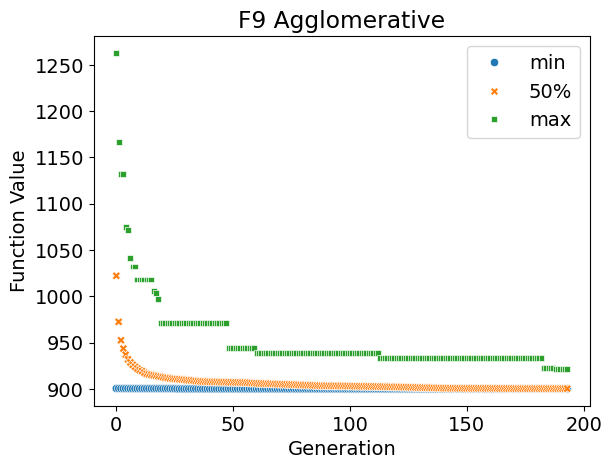

In [37]:
Plot_Min50Max(Agglomerative)

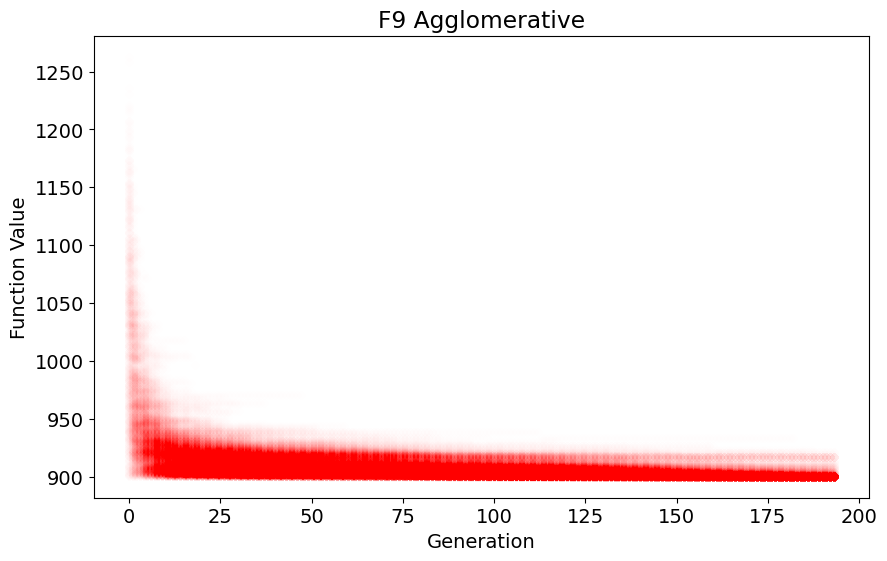

In [38]:
Plot_Generation_FunctionValues(Agglomerative)

In [39]:
InteractivePlot(Agglomerative)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [40]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,997.276127,997.276127,967.138090,967.138090,967.138090,967.138090,967.138090,967.138090,947.315778,947.315778,...,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050
1,1041.133374,1041.133374,970.176234,970.176234,970.176234,970.176234,970.176234,970.176234,970.176234,970.176234,...,904.915137,904.915137,904.851186,904.851186,904.851186,904.851186,904.851186,904.851186,904.851186,904.851186
2,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,...,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.919239
3,1140.997027,1140.997027,1046.977788,908.746227,908.746227,908.746227,908.746227,908.746227,908.746227,908.746227,...,908.746227,908.746227,904.857010,904.857010,904.857010,904.857010,904.857010,904.857010,904.857010,904.857010
4,1055.817988,1055.817988,1015.298281,1015.298281,926.173699,926.173699,926.173699,926.173699,926.173699,926.173699,...,912.317701,912.317701,901.068947,901.068947,901.068947,901.068947,901.068947,901.068947,901.068947,901.068947
5,1099.719379,1059.549379,1026.347907,1026.347907,926.614295,926.614295,926.614295,926.614295,926.614295,926.614295,...,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625
6,934.543530,934.543530,934.543530,934.543530,934.543530,934.543530,934.543530,934.543530,930.235956,925.759394,...,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372
7,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,...,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154
8,1147.447615,946.981992,946.981992,946.981992,946.981992,946.981992,946.981992,946.981992,909.936711,909.936711,...,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270
9,1148.995742,1086.951514,1030.605885,1030.605885,907.835291,907.835291,907.835291,907.835291,907.835291,907.835291,...,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520


In [41]:
RandomParameters.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1023.006119,984.662112,965.712671,954.738740,946.660577,940.425033,935.431729,931.829667,928.861076,926.237867,...,905.096575,904.917462,904.753150,904.543937,904.356079,904.273725,904.141864,903.989928,903.892084,903.730767
std,75.830133,57.946911,45.271341,39.523382,34.329985,29.733011,26.305767,23.595145,22.316251,20.791207,...,5.000370,4.836829,4.711451,4.505193,4.302480,4.263439,4.097776,4.028827,3.945023,3.818559
min,900.624531,900.256957,900.256957,900.256957,900.256957,900.256957,900.256957,900.180962,900.180962,900.180962,...,900.023970,900.023970,900.023970,900.023970,900.023970,900.023970,900.023970,900.023970,900.022090,900.022090
25%,961.428405,938.259191,929.813886,924.223074,920.578198,918.389439,916.692780,914.368015,911.859513,909.870141,...,901.541472,901.462565,901.406068,901.352079,901.296704,901.240463,901.221976,901.183331,901.161706,901.121334
50%,1016.482056,972.806888,957.345283,944.994884,938.861193,933.798001,929.533095,926.730410,924.270125,921.961335,...,903.416921,903.263369,903.115708,902.985829,902.849577,902.745106,902.645257,902.539270,902.473005,902.301435
75%,1073.403977,1022.025661,993.022816,975.754431,965.279542,957.788069,950.400204,945.170238,940.179292,936.321534,...,906.991274,906.872908,906.448702,906.061380,905.942875,905.865931,905.659698,905.399453,905.220047,904.960566
max,1287.540027,1223.486286,1144.452687,1126.300811,1079.040687,1051.147616,1051.147616,1029.260303,1014.436440,1009.161297,...,927.249369,927.249369,927.249369,927.249369,926.968803,924.418329,924.418329,924.418329,924.418329,924.418329


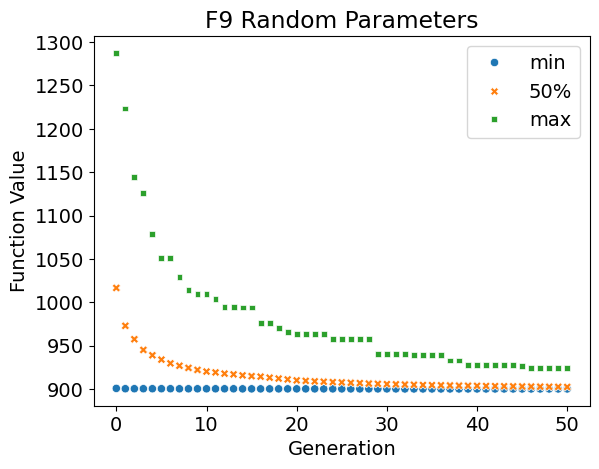

In [42]:
Plot_Min50Max(RandomParameters)

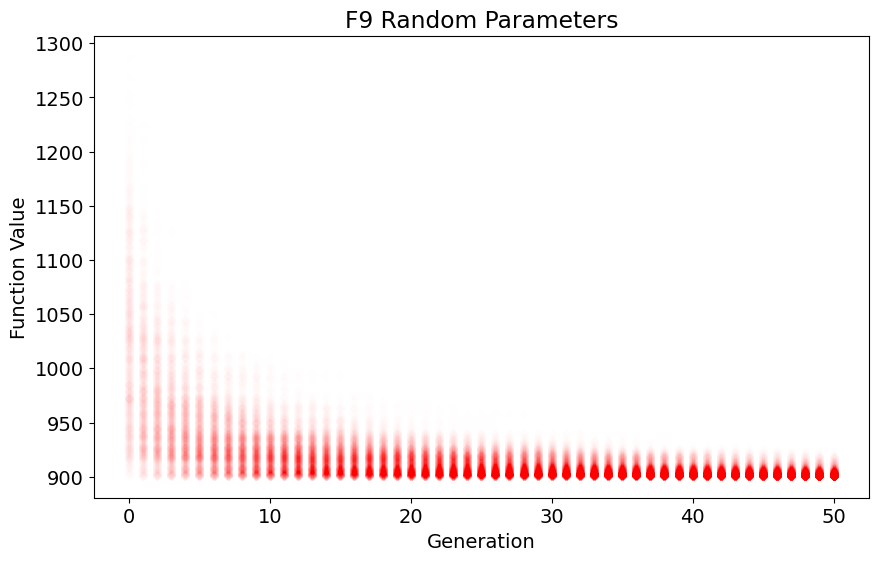

In [43]:
Plot_Generation_FunctionValues(RandomParameters)

In [44]:
InteractivePlot(RandomParameters)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…